# 🚗 **Uber Ride Analytics Dataset (2024)**

A comprehensive dataset containing detailed ride-sharing data from **Uber’s 2024 operations**, offering deep insights into booking patterns, vehicle performance, customer behavior, revenue streams, and satisfaction metrics.

---

## 📊 **Dataset Overview**

The dataset records **148,770 total bookings** across multiple vehicle types, providing a complete picture of Uber’s operational performance, including completed rides, cancellations, financial metrics, and customer feedback.

### **Key Statistics**

| Metric                     |     Value     | Description                     |
| :------------------------- | :-----------: | :------------------------------ |
| **Total Bookings**         | 148.77K rides | Overall number of ride requests |
| **Success Rate**           |     65.96%    | ≈ 93K completed rides           |
| **Cancellation Rate**      |      25%      | ≈ 37.4K cancelled rides         |
| **Customer Cancellations** |     19.15%    | ≈ 27K rides                     |
| **Driver Cancellations**   |     7.45%     | ≈ 10.5K rides                   |

---

## 📋 **Data Schema**

| **Column Name**                     | **Description**                                                              |
| ----------------------------------- | ---------------------------------------------------------------------------- |
| `Date`                              | Date of the booking                                                          |
| `Time`                              | Time of the booking                                                          |
| `Booking ID`                        | Unique identifier for each ride                                              |
| `Booking Status`                    | Status of booking (Completed, Cancelled by Customer/Driver, etc.)            |
| `Customer ID`                       | Unique customer identifier                                                   |
| `Vehicle Type`                      | Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan) |
| `Pickup Location`                   | Ride start location                                                          |
| `Drop Location`                     | Destination location                                                         |
| `Avg VTAT`                          | Average driver arrival time (min)                                            |
| `Avg CTAT`                          | Average trip duration (min)                                                  |
| `Cancelled Rides by Customer`       | Customer-initiated cancellation flag                                         |
| `Reason for cancelling by Customer` | Customer’s cancellation reason                                               |
| `Cancelled Rides by Driver`         | Driver-initiated cancellation flag                                           |
| `Driver Cancellation Reason`        | Driver’s cancellation reason                                                 |
| `Incomplete Rides`                  | Incomplete ride flag                                                         |
| `Incomplete Rides Reason`           | Reason for incomplete rides                                                  |
| `Booking Value`                     | Total fare amount (currency units)                                           |
| `Ride Distance`                     | Distance covered (km)                                                        |
| `Driver Ratings`                    | Rating given to the driver (1–5)                                             |
| `Customer Rating`                   | Rating given by the customer (1–5)                                           |
| `Payment Method`                    | Payment type (UPI, Cash, Credit Card, Uber Wallet, Debit Card)               |

---

## 🚘 **Vehicle Fleet Coverage**

| Vehicle Type      | Total Bookings | Success Rate | Avg Distance | Total Distance |
| ----------------- | -------------: | -----------: | -----------: | -------------: |
| **Auto**          |         12.88M |        91.1% |     25.99 km |        602K km |
| **eBike/Bike**    |         11.46M |        91.1% |     26.11 km |        537K km |
| **Go Mini**       |         10.34M |        91.0% |     25.99 km |        482K km |
| **Go Sedan**      |          9.37M |        91.1% |     25.98 km |        433K km |
| **Premier Sedan** |          6.28M |        91.2% |     25.95 km |        292K km |
| **UberXL**        |          1.53M |        92.2% |     25.72 km |         72K km |

📈 **Insight:**
Larger and premium vehicle types (Premier Sedan, UberXL) maintain slightly higher success rates, reflecting higher reliability and potentially more experienced drivers.

---

## 💰 **Revenue Distribution by Payment Method**

| Payment Method  | Share of Total Revenue |
| --------------- | ---------------------: |
| **UPI**         |                   ~40% |
| **Cash**        |                   ~25% |
| **Credit Card** |                   ~15% |
| **Uber Wallet** |                   ~12% |
| **Debit Card**  |                    ~8% |

💡 *UPI and Cash dominate payment methods, reflecting user preference for fast and mobile transactions.*

---

## 🚫 **Cancellation Patterns**

### **Customer Cancellations**

| Reason            | Percentage |
| ----------------- | ---------: |
| Wrong Address     |      22.5% |
| Driver Issues     |      22.4% |
| Driver Not Moving |      22.2% |
| Change of Plans   |      21.9% |
| App Issues        |      11.0% |

### **Driver Cancellations**

| Reason                  | Percentage |
| ----------------------- | ---------: |
| Capacity Issues         |      25.0% |
| Customer Related Issues |      25.3% |
| Personal & Car Issues   |      24.9% |
| Customer Behavior       |      24.8% |

🧩 *Both customers and drivers show a diverse mix of cancellation causes — many linked to operational or behavioral factors.*

---

## ⭐ **Rating Analysis**

| Metric                     | Observation                                            |
| -------------------------- | ------------------------------------------------------ |
| **Customer Ratings**       | Consistently high (4.40–4.41) across all vehicle types |
| **Driver Ratings**         | Slightly lower but stable (4.23–4.24)                  |
| **Highest Rated**          | Go Sedan (4.41 average customer rating)                |
| **Most Satisfied Drivers** | UberXL (4.24 average driver rating)                    |

✨ *High satisfaction symmetry between customers and drivers indicates reliable service quality and user trust.*

---

## 📈 **Data Quality Summary**

| Attribute             | Description                                             |
| --------------------- | ------------------------------------------------------- |
| **Completeness**      | Comprehensive coverage with minimal missing data        |
| **Consistency**       | Standardized vehicle and status categories              |
| **Temporal Coverage** | Full 2024, daily granularity                            |
| **Geographic Scope**  | Multiple pickup and drop locations                      |
| **Balance**           | Good distribution across vehicle types and time periods |

✅ *This makes the dataset robust, consistent, and ideal for data modeling and machine learning tasks.*

---

[Kaggle](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/ncr_ride_bookings.csv')

df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.shape

(150000, 21)

In [4]:
print(df.info())

print("Valores nulos")
      
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
df["Booking Status"].value_counts(normalize=True)

Booking Status
Completed                0.62
Cancelled by Driver      0.18
No Driver Found          0.07
Cancelled by Customer    0.07
Incomplete               0.06
Name: proportion, dtype: float64

In [7]:
df["Reason"] = np.nan

df["Reason"][df["Booking Status"] == "No Driver Found"]="No Driver Available"
df["Reason"][df["Booking Status"] == "Completed"]="Trip Completed Successfully"
print(df["Reason"].unique())

inc_res=df["Incomplete Rides Reason"].unique()
for reason in inc_res:
    df["Reason"][df["Incomplete Rides Reason"]==reason]=reason
print(df["Reason"].unique())

res_CancelledbyCustomer=df["Reason for cancelling by Customer"].unique()
for reason in res_CancelledbyCustomer:
    df["Reason"][df["Reason for cancelling by Customer"]==reason]=reason
df["Reason"].unique()   

res_CancelledbyDriver=df["Driver Cancellation Reason"].unique()
for reason in res_CancelledbyDriver:
    df["Reason"][df["Driver Cancellation Reason"]==reason]=reason
print(df["Reason"].unique())

df["Reason"].isna().sum()

['No Driver Available' nan 'Trip Completed Successfully']
['No Driver Available' 'Vehicle Breakdown' 'Trip Completed Successfully'
 'Other Issue' nan 'Customer Demand']
['No Driver Available' 'Vehicle Breakdown' 'Trip Completed Successfully'
 'Other Issue' 'Personal & Car related issues' 'Customer related issue'
 'Driver is not moving towards pickup location'
 'More than permitted people in there' 'Driver asked to cancel'
 'Customer Demand' 'The customer was coughing/sick' 'AC is not working'
 'Change of plans' 'Wrong Address']


0

In [8]:
df.drop([
    "Incomplete Rides Reason"
    ,"Driver Cancellation Reason"
    ,"Reason for cancelling by Customer"
    ,"Incomplete Rides"
    ,"Cancelled Rides by Customer"
    ,"Cancelled Rides by Driver"
    
],axis=1,inplace=True)

df.shape

(150000, 16)

In [9]:
df.isna().sum().sort_values()

Date                   0
Time                   0
Booking ID             0
Booking Status         0
Customer ID            0
Vehicle Type           0
Pickup Location        0
Drop Location          0
Reason                 0
Avg VTAT           10500
Avg CTAT           48000
Booking Value      48000
Ride Distance      48000
Payment Method     48000
Driver Ratings     57000
Customer Rating    57000
dtype: int64

In [10]:
df["Booking Value"]=df["Booking Value"].fillna(df.groupby(['Pickup Location', 'Drop Location'])["Ride Distance"].transform("median"))
df["Booking Value"].fillna(df["Booking Value"].median(),inplace=True)
print((df["Booking Value"].isna().sum()/len(df))*100)

0.0


In [11]:
df["Ride Distance"]=df["Ride Distance"].fillna(df.groupby(['Pickup Location', 'Drop Location'])["Ride Distance"].transform("median"))
print((df["Ride Distance"].isna().sum()/len(df))*100)
df["Ride Distance"].fillna(df["Ride Distance"].median(),inplace=True)
print((df["Ride Distance"].isna().sum()/len(df))*100)

1.1933333333333334
0.0


In [12]:
df["Driver Ratings"].fillna(-1, inplace=True)
df["Customer Rating"].fillna(-1, inplace=True)

In [13]:
df["Payment Method"].fillna("Ride wasnt finished" , inplace=True)

In [14]:
df["Avg VTAT"].fillna(-1, inplace=True)
df["Avg CTAT"].fillna(-1, inplace=True)

In [15]:
print(df.isna().sum().sort_values())

Date               0
Time               0
Booking ID         0
Booking Status     0
Customer ID        0
Vehicle Type       0
Pickup Location    0
Drop Location      0
Avg VTAT           0
Avg CTAT           0
Booking Value      0
Ride Distance      0
Driver Ratings     0
Customer Rating    0
Payment Method     0
Reason             0
dtype: int64


In [16]:
df["Date"]= pd.to_datetime(df["Date"])
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Reason
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,-1.0,-1.0,30.805,30.805,-1.0,-1.0,Ride wasnt finished,No Driver Available
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.000,5.730,-1.0,-1.0,UPI,Vehicle Breakdown
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.000,13.580,4.9,4.9,Debit Card,Trip Completed Successfully
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.000,34.020,4.6,5.0,UPI,Trip Completed Successfully
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.000,48.210,4.1,4.3,UPI,Trip Completed Successfully


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             150000 non-null  datetime64[ns]
 1   Time             150000 non-null  object        
 2   Booking ID       150000 non-null  object        
 3   Booking Status   150000 non-null  object        
 4   Customer ID      150000 non-null  object        
 5   Vehicle Type     150000 non-null  object        
 6   Pickup Location  150000 non-null  object        
 7   Drop Location    150000 non-null  object        
 8   Avg VTAT         150000 non-null  float64       
 9   Avg CTAT         150000 non-null  float64       
 10  Booking Value    150000 non-null  float64       
 11  Ride Distance    150000 non-null  float64       
 12  Driver Ratings   150000 non-null  float64       
 13  Customer Rating  150000 non-null  float64       
 14  Payment Method   150

In [18]:
df["day"] = df["Date"].dt.day_name()
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month_name()

df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Reason,day,year,month
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,-1.0,-1.0,30.805,30.805,-1.0,-1.0,Ride wasnt finished,No Driver Available,Saturday,2024,March
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.000,5.730,-1.0,-1.0,UPI,Vehicle Breakdown,Friday,2024,November
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.000,13.580,4.9,4.9,Debit Card,Trip Completed Successfully,Friday,2024,August
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.000,34.020,4.6,5.0,UPI,Trip Completed Successfully,Monday,2024,October
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.000,48.210,4.1,4.3,UPI,Trip Completed Successfully,Monday,2024,September


In [19]:
df.shape

(150000, 19)

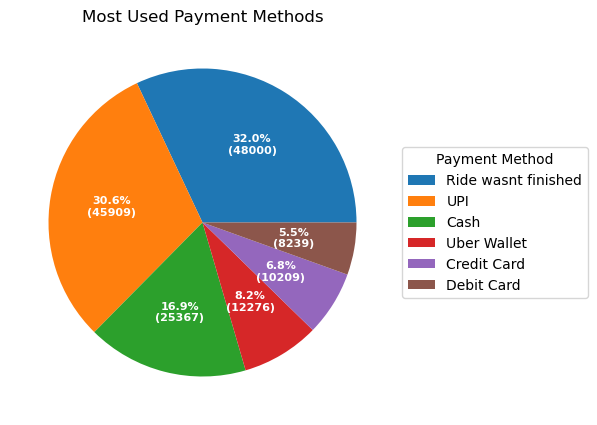

In [20]:
# Contar cuántas veces aparece cada método de pago
payment_counts = df['Payment Method'].value_counts()

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

# Función para mostrar porcentajes
def func(pct, allvals):
    absolute = int(round(pct/100. * sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# Crear el gráfico de pastel
wedges, texts, autotexts = ax.pie(
    payment_counts.values,
    autopct=lambda pct: func(pct, payment_counts.values),
    textprops=dict(color="w")
)

# Agregar la leyenda
ax.legend(
    wedges,
    payment_counts.index,
    title="Payment Method",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Personalizar texto
plt.setp(autotexts, size=8, weight="bold")

# Título del gráfico
ax.set_title("Most Used Payment Methods")

plt.savefig('../figures/paymentMethod.png')

# Mostrar el gráfico
plt.show()

A pie chart representing the distribution of payment methods across all bookings.

### Interpretation:

- UPI (30.6%) and Cash (16.9%) dominate among completed rides.

- The blue segment (“Ride wasn’t finished”, 32%) corresponds to unfinished or canceled bookings.

- Credit and debit cards contribute less (<15%), suggesting user preference for quick or mobile payment methods.

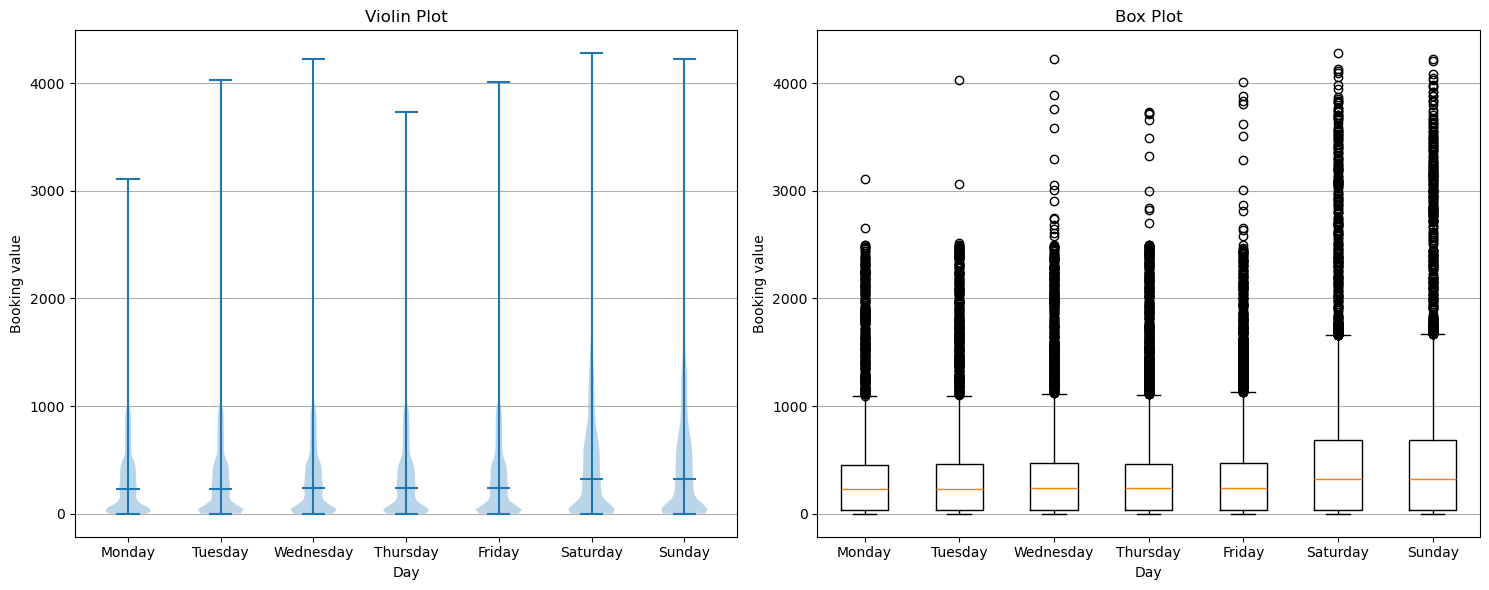

In [21]:
# Variable numérica a analizar
data_col = "Booking Value"

# Ordenar días de la semana en orden lógico
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["day"] = pd.Categorical(df["day"], categories=order, ordered=True)

# Extraer datos por día
data = [df.loc[df["day"] == d, data_col].values for d in order if d in df["day"].unique()]

# Crear los gráficos
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de violín
axs[0].violinplot(data, showmeans=False, showmedians=True)
axs[0].set_title('Violin Plot')

# Gráfico de boxplot
axs[1].boxplot(data)
axs[1].set_title('Box Plot')

# Personalizar ejes
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks(range(1, len(data) + 1))
    ax.set_xticklabels([d for d in order if d in df["day"].unique()])
    ax.set_xlabel('Day')
    ax.set_ylabel('Booking value')

plt.tight_layout()
plt.savefig('../figures/boxplotViolinDayValue.png')
plt.show()

Distributions of the booking_value feature for each weekday, represented both as:

- Violin plot: density and spread of the data, and

- Box plot: median, quartiles, and outliers.

### Interpretation:

- The distribution shape is similar across all weekdays.

- Slightly higher values appear on weekends, likely due to longer trips or dynamic pricing.

- The median value remains within 50–500 monetary units, but there are numerous outliers (>3000), corresponding to long or premium rides.

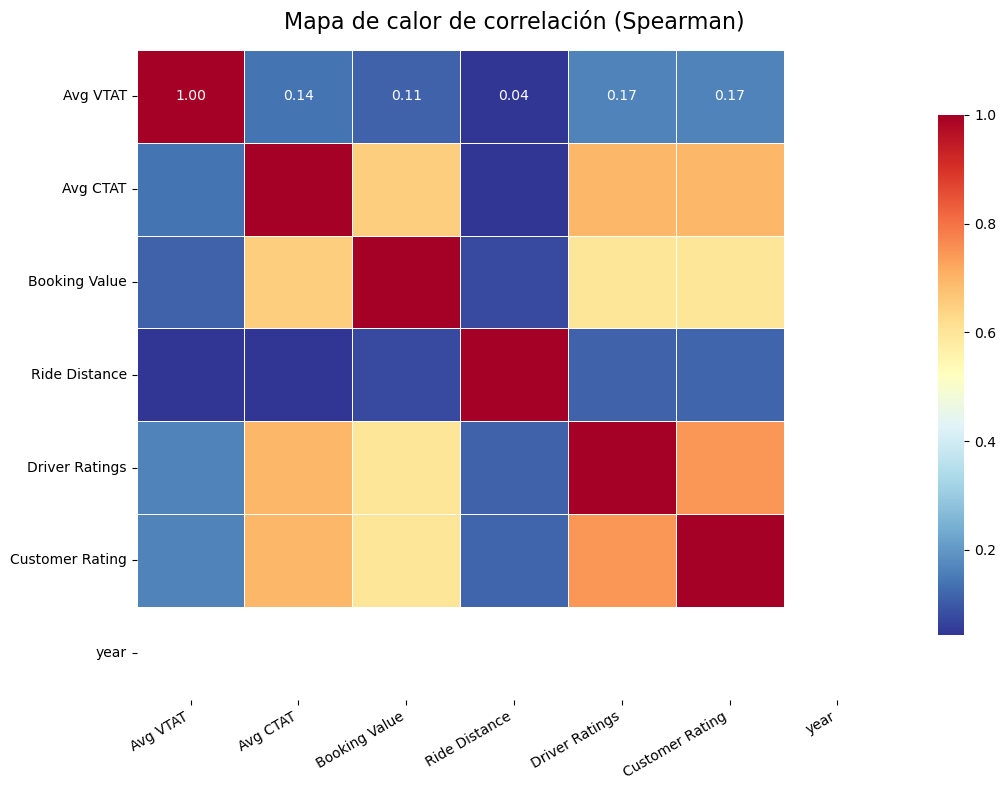

In [22]:
num_cols = df.select_dtypes(include=['number']).columns

corr_matrix = df[num_cols].corr(method='spearman')

plt.figure(figsize=(11, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdYlBu_r',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size":10}  # texto más grande
)
plt.title('Mapa de calor de correlación (Spearman)', fontsize=16, pad=15)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('../figures/correlation.png')
plt.show()

Pairwise correlations among numerical variables (Avg VTAT, Avg CTAT, Booking Value, Ride Distance, Driver Ratings, Customer Rating).

### Interpretation:

- All correlations are low (<0.2), meaning low multicollinearity.

- Driver Ratings and Customer Rating show moderate correlation (~0.45), indicating mutual evaluation consistency.

- Avg CTAT correlates slightly with Booking Value, confirming that longer rides cost more.

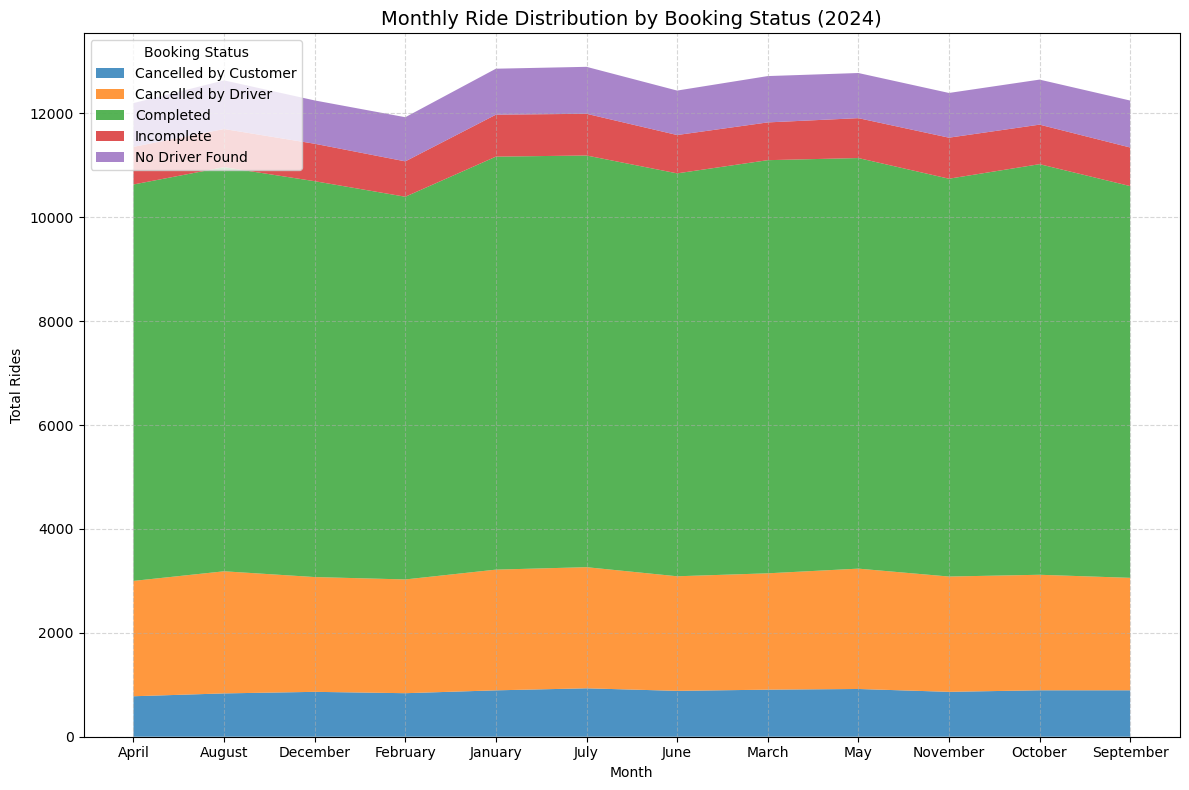

In [23]:
colors = plt.cm.tab10.colors  # paleta de 10 colores
# Agrupar datos
monthly_status = df.groupby(["month","Booking Status"]).size().reset_index(name="Total")

# Crear la tabla pivote
pivot_data = monthly_status.pivot(
    index="month",
    columns="Booking Status",
    values="Total"
).fillna(0)

fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(
    pivot_data.index,
    pivot_data.T,
    labels=pivot_data.columns,
    colors=colors[:len(pivot_data.columns)],
    alpha=0.8
)

ax.set_title("Monthly Ride Distribution by Booking Status (2024)", fontsize=14)
ax.set_xlabel("Month")
ax.set_ylabel("Total Rides")
ax.legend(title="Booking Status", loc="upper left")
ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig('../figures/bookingStatus.png')
plt.show()

A stacked area chart illustrating the total number of Uber rides per month, divided by booking status (Completed, Cancelled by Customer, Cancelled by Driver, Incomplete, No Driver Found).

### Interpretation:

- Completed rides (green) dominate the distribution, consistently accounting for around 65–70% of all trips.

- Cancellations by customers (blue) and drivers (orange) remain stable throughout the year, showing no major seasonal fluctuation.

- Activity peaks in January and July, likely related to travel or vacation periods.

- The consistent pattern indicates operational stability and a balanced demand curve across months.

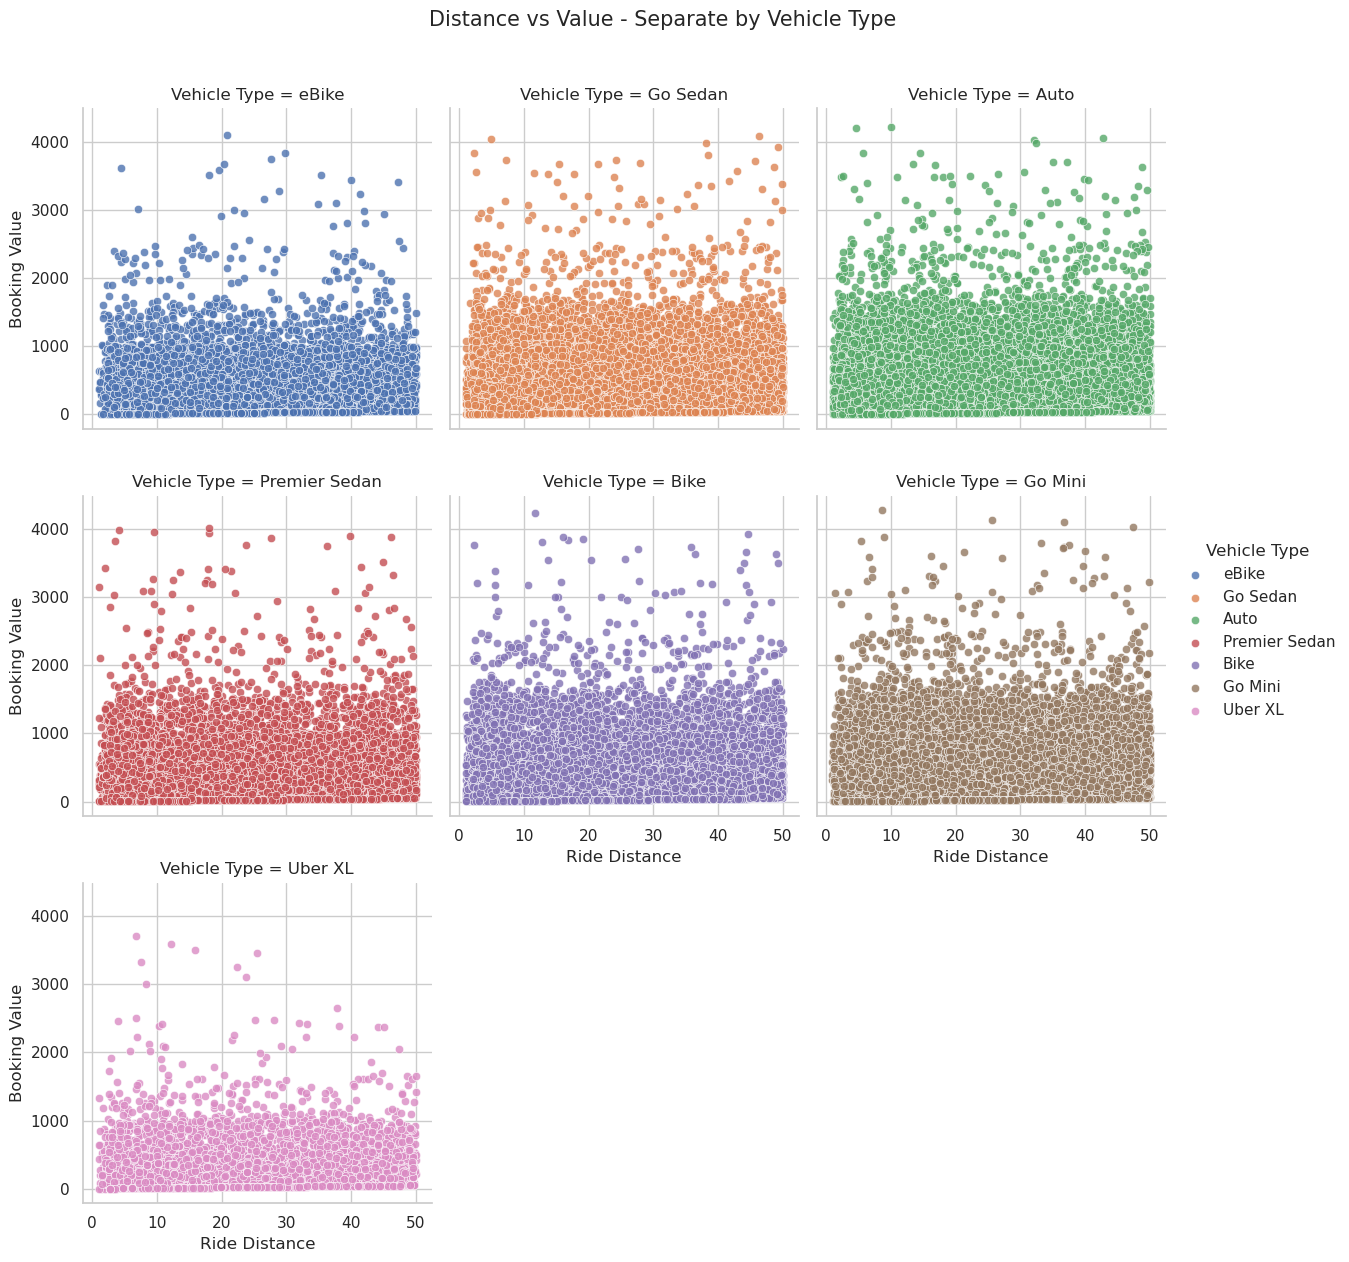

In [24]:
sns.set_theme(style="whitegrid")

# Crear el facet grid (un gráfico por tipo de vehículo)
g = sns.FacetGrid(df, col="Vehicle Type", hue="Vehicle Type", col_wrap=3, height=4, sharex=True, sharey=True)

# Dibujar los puntos
g.map_dataframe(sns.scatterplot, x="Ride Distance", y="Booking Value", alpha=0.8)

# Ajustes estéticos
g.add_legend(title="Vehicle Type")
g.set_axis_labels("Ride Distance", "Booking Value")
g.fig.suptitle("Distance vs Value - Separate by Vehicle Type", fontsize=15, y=1.05)
plt.savefig('../figures/distanteValue.png')
plt.show()

Scatterplots of Ride Distance vs. Booking Value, grouped by vehicle type.

### Interpretation:

- Clear positive relationship — longer trips correspond to higher booking values.

- Premier Sedan and Uber XL rides have higher fares and longer distances.

- eBike/Bike and Auto categories show shorter, low-cost trips.

In [25]:
df.to_excel("../data/processed/Uberdata.xlsx",index=False)

In [26]:
df.iloc[:10000,].to_excel("../data/processed/UberdataResume.xlsx",index=False)